# Laboratorio #9: Extracción de información en redes

La recuperación de información en redes es fundamental en el contexto de la información digital y la web. Razones como:
- acceso rápido a la información,
- búsqueda precisa, 
- organización de la información y
- descubrimiento de conocimientos

son algunos motivos que muestran la importancia que tiene este proceso no solo en los motores de búsqueda, sino también en la organización de los datos en las bases de datos y en sistemas de gestión de contenido.

En el análisis y la extracción de información en redes se trabaja con la centralidad y la detección de comunidades. La **centralidad** se refiere a la medida en que un nodo específico en una red es importante o influyente. Existen diferentes tipos de centralidad, como la centralidad de grado (que se basa en el número de conexiones de un nodo), la centralidad de intermediación (que mide la importancia de un nodo en el flujo de información entre otros nodos) y la centralidad de cercanía (que evalúa qué tan cerca está un nodo de otros nodos en la red). La centralidad ayuda a identificar los nodos más importantes en una red, que pueden ser puntos de control, difusión de información o intermediarios clave.

Por su parte, la **detección de comunidades** se refiere al proceso de identificar grupos de nodos densamente conectados dentro de la red, donde los nodos dentro de un grupo tienen más conexiones entre sí que con nodos fuera del grupo. Estos grupos se denominan comunidades y pueden representar subgrupos funcionales, grupos de interés compartido o divisiones naturales en una red. Los algoritmos de detección de comunidades pueden ayudar a entender la estructura interna de una red, identificar subgrupos cohesivos y revelar patrones de interacción entre nodos.

## Juego de Tronos ⚔️ 👑 🩸

Durante la clase se trabajará con las relaciones de los personajes dentro de *"A Storm of Swords"* de George R. R. Martin, la tercera novela de su serie *"A Song of Ice and Fire"* (también conocida por la adaptación televisiva de HBO como *"Game of Thrones"*).

### Información sobre los personajes y sus relaciones
Los datos contienen 353 relaciones entre los 107 personajes distintos capturados en la obra.

Cada relación es simétrica y se encuentra ponderada, cuyo cálculo se determinó en función del número de veces en que aparecieron los nombres de dos personajes con una diferencia de 15 palabras entre sí en la novela, es decir, el numéro de ventanas de tamaño 15 donde 2 personajes coocurren.

### Antecedentes y significado

Los personajes de esta trilogía se encuentran dispersos geográficamente y enredados en sus propias redes sociales, como son las casas nobles (consulte la imagen).

<div style="text-align:center;">
    <img src="got.png" width="500">
</div>
<!-- ![Logo de Jupyter](got.png) -->

Para aquellos que no están familiarizados con GOT, aquí hay un poco más de información general (a través de Beveridge y Shan) que podría ser útil para comprender la red social:

> La narración comienza en un momento de paz, con todas las casas unificadas bajo el gobierno del rey Robert Baratheon, quien sostiene el Trono de Hierro... [Entonces el rey Robert muere y se desata todo.]

> Impulsados por una causa o circunstancia, los personajes de muchas familias nobles se lanzan a viajes arduos y entrelazados. Entre estas casas se encuentran:
> - la honorable familia Stark (Eddard, Catelyn, Robb, Sansa, Arya, Bran y Jon Snow),
> - los pomposos Lannister (Tywin, Jaime, Cersei, Tyrion y Joffrey),
> - los despreciados Baratheon (liderados por el hermano de Robert, Stannis) y 
> - la exiliada Daenerys, la última de la otrora poderosa Casa Targaryen.

Luego, usted ha sido designado a desentrañar informaciones ocultas en esta red de personajes. Para ello se han definido un conjunto de ejercicios, pero antes importará las librerías necesarias a usar.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### **Ejercicio #1:** Construya un grafo con la información que se provee en el fichero `got.csv`. 

###### Ayuda: Consulte la función `networkx.from_pandas_edgelist`.

In [2]:
def build_graph(data_path):
    """
    Builds a graph from the information defined in a CSV file
    
    Arg:
        - data_path (str) : CSV file path
    
    Return:
        networkx.classes.graph.Graph
        
    """
    # raise Exception('Not Implemented')
    
    got_df = pd.read_csv(data_path)
    
    print('Sample of the information')
    print(got_df)
    
    return nx.from_pandas_edgelist(got_df, 'Source', 'Target', 'Weight') 

In [3]:
data_path = 'got.csv'
graph = build_graph(data_path) 

Sample of the information
      Source       Target  Weight
0      Aemon        Grenn       5
1      Aemon      Samwell      31
2      Aerys        Jaime      18
3      Aerys       Robert       6
4      Aerys       Tyrion       5
..       ...          ...     ...
347   Walder        Petyr       6
348   Walder       Roslin       6
349   Walton        Jaime      10
350  Ygritte       Qhorin       7
351  Ygritte  Rattleshirt       9

[352 rows x 3 columns]


Veamos el grafo recién construido ...

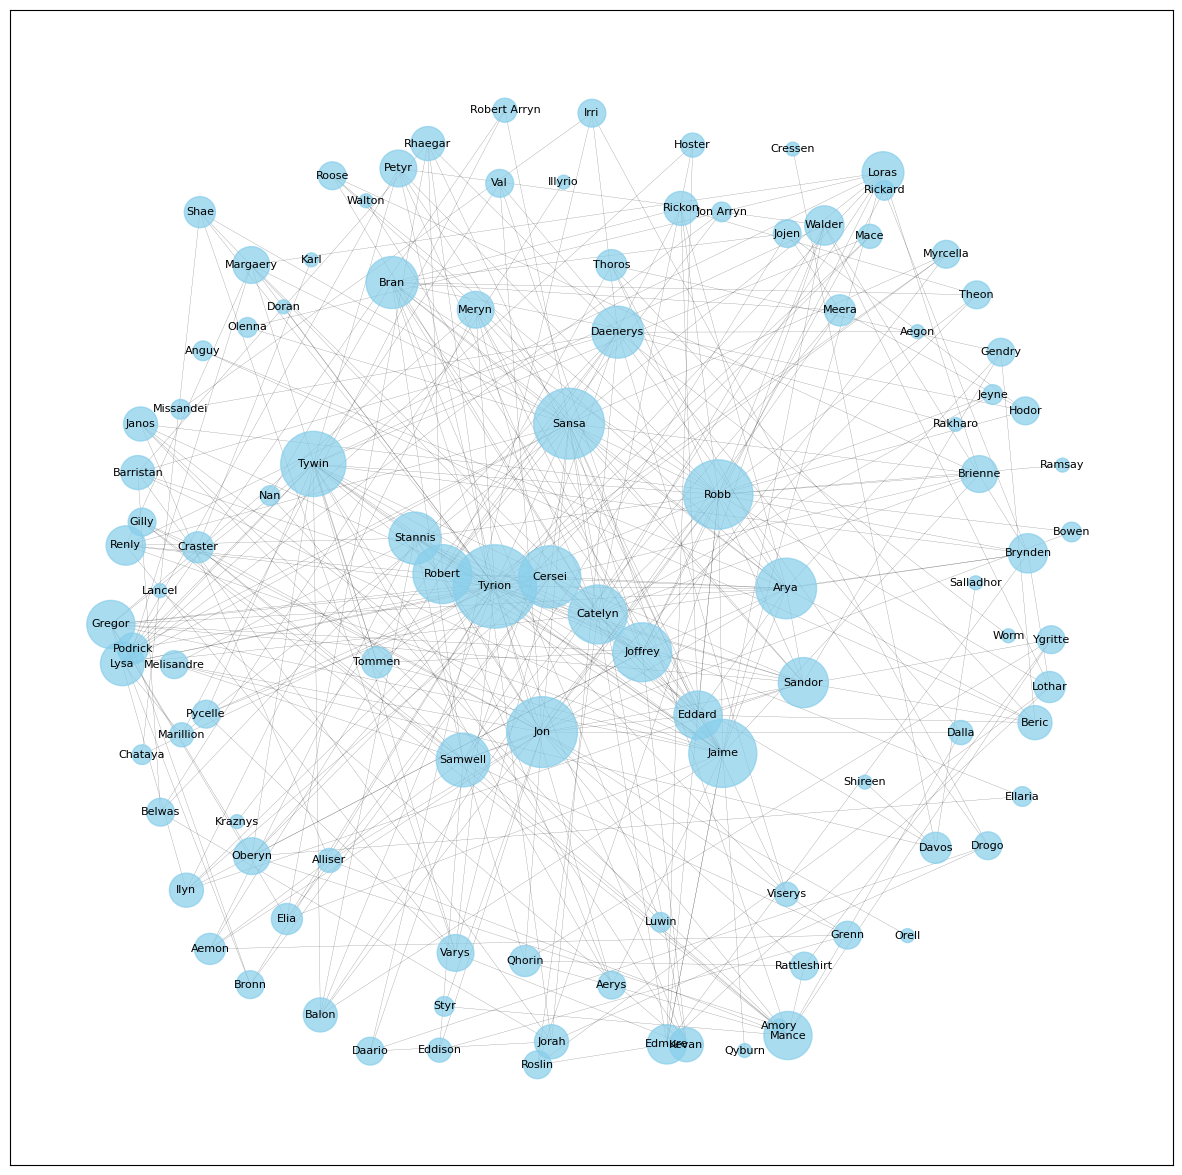

In [4]:
plt.figure(figsize=(15, 15), frameon=False)  

pos = nx.spring_layout(graph, k=0.8, iterations=20)

node_sizes = [100 * graph.degree[n] for n in graph.nodes]

nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(graph, pos, width=0.2, alpha=0.5)

threshold = 0.8
significant_nodes = [node for node in graph.nodes if graph.degree[node] > threshold]  # Define your threshold
labels = {node: node for node in significant_nodes}
nx.draw_networkx_labels(graph, pos, labels, font_size=8)

plt.show()


### **Ejercicio #2:** Haciendo uso del grafo de relaciones, responda:

1. ¿Quiénes son los personajes más importantes en la trama?
   
   ###### Hint Profesor: La centralidad de grado es útil para identificar los personajes con más conexiones dentro de la red, lo que puede indicar su importancia en la historia.

2. ¿Qué personajes tienen más poder o influencia política?
   
   ###### Hint Profesor: La centralidad de intermediación identifica a los personajes que actúan como intermediarios clave entre otros personajes en la red, lo que sugiere que tienen un gran poder político o influencia.

3. ¿Quiénes son los personajes más aislados o periféricos de la historia?
   
   ###### Hint Profesor: La centralidad de cercanía identifica los personajes que están más cerca de todos los demás en la red, lo que puede indicar su grado de conexión con el resto de la trama.


In [5]:
# 2.1

# Not Implemented
# info = None

# Calcular centralidad de grado
degree_centrality = nx.degree_centrality(graph)

# Obtener los personajes más importantes
print("Personajes más importantes:")
for personaje, centralidad in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{personaje}: {centralidad}")

Personajes más importantes:
Tyrion: 0.33962264150943394
Jon: 0.24528301886792453
Sansa: 0.24528301886792453
Robb: 0.2358490566037736
Jaime: 0.22641509433962265
Tywin: 0.20754716981132074
Cersei: 0.18867924528301885
Arya: 0.1792452830188679
Robert: 0.16981132075471697
Joffrey: 0.16981132075471697


In [6]:
# 2.2

# Not Implemented
# info = None

# Calcular centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(graph)

# Obtener los personajes con mayor centralidad de intermediación
print("Personajes más influyentes:")
for personaje, centralidad in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{personaje}: {centralidad}")

Personajes más influyentes:
Jon: 0.22996466368473173
Robert: 0.2094523840293194
Tyrion: 0.19791284320277353
Daenerys: 0.15720345212054956
Robb: 0.1269644713830151
Sansa: 0.12672031668498004
Stannis: 0.1026998617273264
Jaime: 0.09994344156136246
Arya: 0.07960711308183888
Tywin: 0.06553840423231058


In [7]:
# 2.3

# Not Implemented
# info = None

# Calcular centralidad de cercanía
centrality_closeness = nx.closeness_centrality(graph)

# Obtener los personajes más aislados
print("Personajes más aislados:")
for personaje, centralidad in sorted(centrality_closeness.items(), key=lambda x: x[1])[:10]:
    print(f"{personaje}: {centralidad}")

Personajes más aislados:
Illyrio: 0.22268907563025211
Karl: 0.25
Cressen: 0.25
Salladhor: 0.25
Shireen: 0.25
Amory: 0.2617283950617284
Aegon: 0.2683544303797468
Kraznys: 0.2683544303797468
Rakharo: 0.2683544303797468
Worm: 0.2683544303797468


### **Ejercicio #3:** Haciendo uso del grafo de relaciones, identifique:

1. Las comunidades principales en la red de personajes.
2. Subgrupos de al menos cuatro personajes que están altamente interconectados y que podrían tener un papel crucial en la trama.


###### Hint Profesor: Usar `nx.algorithms.community`.

In [8]:
# 3.1

# Not Implemented
# info = None
info = nx.algorithms.community.greedy_modularity_communities(graph)

Veamos el resultado en forma de grafo

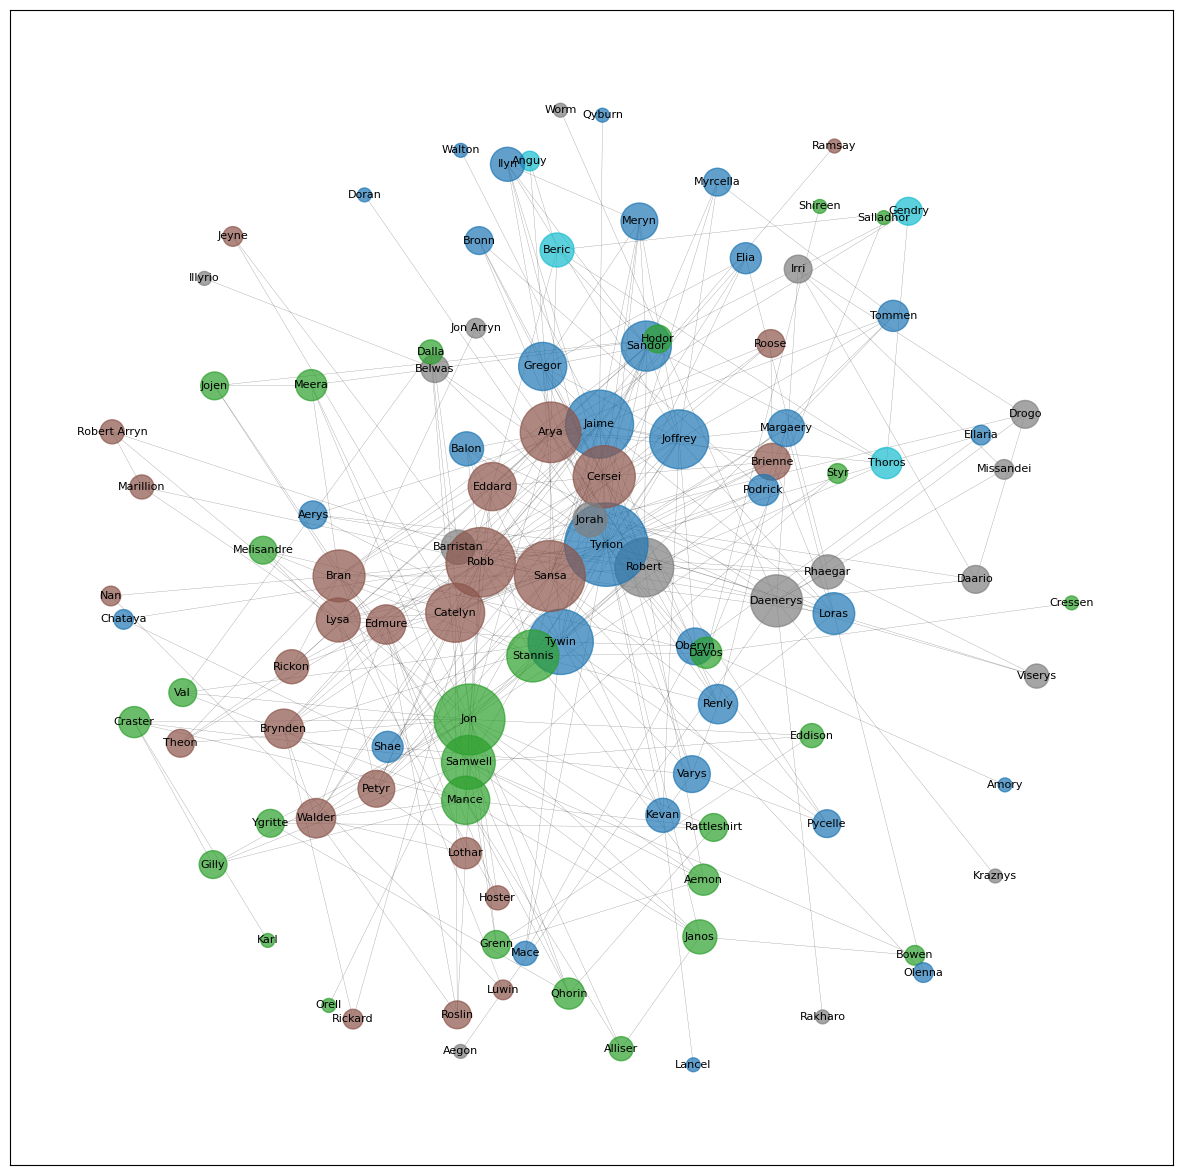

In [9]:
plt.figure(figsize=(15, 15), frameon=False) 

pos = nx.spring_layout(graph, k=0.8, iterations=50)  

min_size = 50 
node_sizes = [max(100 * graph.degree[n], min_size) for n in graph.nodes]

color_map = {}
default_color = 0  
for i, d in enumerate(info):
    for character in d:
        color_map[character] = i
node_colors = [color_map.get(node, default_color) for node in graph.nodes()]

nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.tab10, alpha=0.7)

nx.draw_networkx_edges(graph, pos, width=0.2, alpha=0.5)

labels = {node: node for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos, labels, font_size=8)

plt.show()

In [10]:
# 3.2

# Not Implemented
# info = None
info = list(nx.algorithms.community.k_clique_communities(graph, 5))

Veamos el resultado en forma de grafo

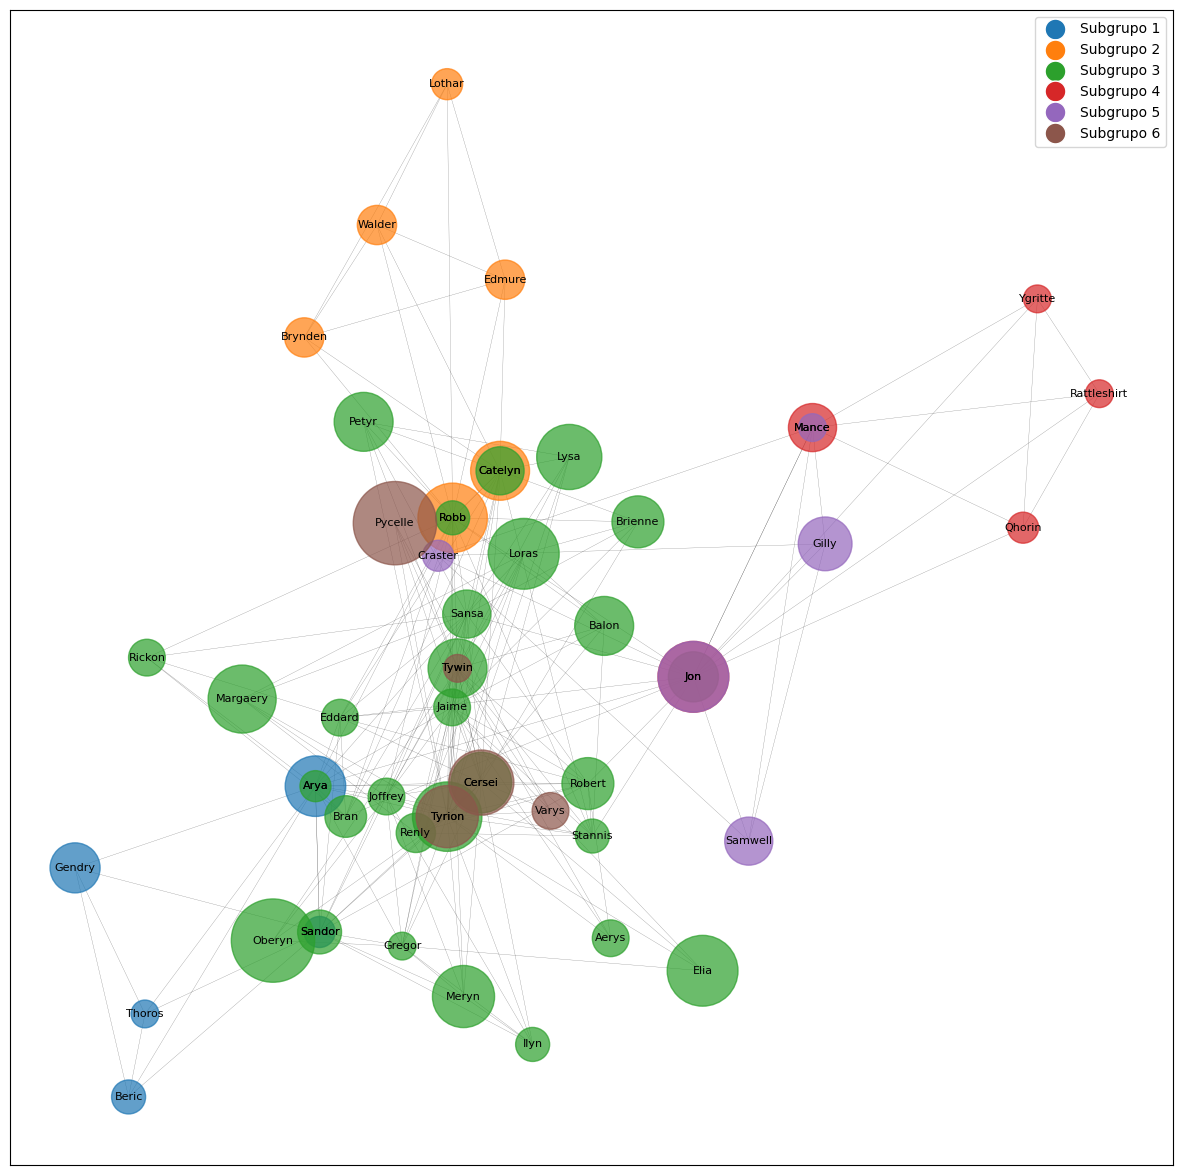

In [11]:
plt.figure(figsize=(15, 15), frameon=False)

pos = nx.spring_layout(graph, k=0.5, iterations=50)  

node_sizes = {n: 100 * graph.degree(n) for n in graph.nodes()}

colors = iter(cm.tab10(range(len(info))))

for i, d in enumerate(info, 1):
    subgraph = graph.subgraph(d)
    color = next(colors)
    nx.draw_networkx_nodes(subgraph, pos, node_size=[node_sizes[n] for n in d], node_color=[color]*len(d), alpha=0.7)
    nx.draw_networkx_edges(subgraph, pos, width=0.2, alpha=0.5)
    labels = {n: n for n in d}  
    nx.draw_networkx_labels(subgraph, pos, labels, font_size=8)

# Correcting the legend to display properly
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=15, label=f'Subgrupo {i}') for i, color in enumerate(cm.tab10(range(len(info))), start=1)], loc='upper right')

plt.show()